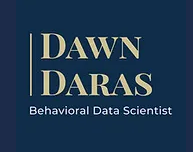


# Principal Component Analysis Using R
##Dawn Daras, M.S. January 2024##
https://dawn-daras.com


##In our other tutorials we covered first, how to describe the data and secondly, how to demonstrate relationships and prediction.  Now, we are going to explore **dimension reduction**  What is "dimension reduction?" ##

##In short, many datasets, particularly with BIG DATA, are messy. They often contain numerous independent/predictor variables for the dependant variable.  To make sense of this data, how does one reduce the data to what are the most important predictors, both quantitatively and qualitatively - those that have the strongest correlation and make the most business sense? ##

##We could just *eliminate features* however we will be *extracting features*##

##In essence, principal component analysis transforms the original variables into a set of new, uncorrelated variables

##This is our ***Principal Component Analysis - PCA***##

###There are three assumptions underlying PCA###

##Existence of an identity matrix##
##Sampling adequacy or an appropriate number of observations to the number of variables##
##Independent variables are correlated to each other#

# *We are going to use the "Fake Bills" Dataset*
###The columns are as follows:#####
###-length, the length of the banknote in mm###
###-height left, the height of the left side of the banknote in mm###
###-height right, the height of the right side of the bank note in mm###
###-diagonal, the diagonal of the bank note in mm####
###-margin low, lower side margin in mm###
###-margin up, upper side margin in mm###
###-is_genuine###

###In this dataset, the DV/dependent variable is "Is Geniune" - meaning that the bill is not fake.  We are going to be reducing the set of variables to the ones which hold the most information###

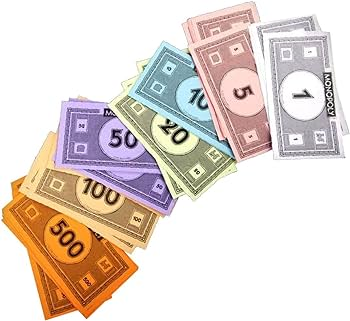

##Run the following code so you can access your google drive from the R notebook. Copy and paste each block into a separate cell and run them in sequence.##

##Make sure that you are connected to an 'R' runtime and not a 'Python' one by going to the menu and checking under "Runtime"

In [1]:
##installing the library for correlation, ggcorrplot for visualization and FactoMineR for the PCA
install.packages("corrr")
install.packages("corrplot")
install.packages("ggcorrplot")
install.packages("FactoMineR")
install.packages("psych")
install.packages("dplyr")
install.packages("repr")
install.packages("factoextra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘permute’, ‘Rcpp’, ‘ca’, ‘foreach’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘ggrepel’, ‘seriation’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘later’, ‘lazyeval’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘httpuv’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mn

In [2]:
##calling the libraries we just installed
library(corrr)
library(ggcorrplot)
library(corrplot)
library(FactoMineR)
library(psych)
library(dplyr)
library(factoextra)
library(repr)

Loading required package: ggplot2

corrplot 0.92 loaded


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



##Because Google Drive can only mount in Python runtimes the data you upload will only be available temporarily in each session and must be uploaded for each session##

##To upload data for each session:##

##Step 1 Save your data in your google drive or a folder in your computer.##

##Step 2 Upload the data in your file directory##

###hint...if you right click on your data, it will allow you to copy the path and file name together.  Put that between the quotation marks.###

In [4]:
df <- read.csv("/content/fakebills.csv", header=TRUE, stringsAsFactors=FALSE)
head(df)


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,171.81,104.86,104.95,4.52,2.89,112.83
2,1,171.46,103.36,103.66,3.77,2.99,113.09
3,1,172.69,104.48,103.50,4.40,2.94,113.16
4,1,171.36,103.91,103.94,3.62,3.01,113.51
5,1,171.73,104.28,103.46,4.04,3.48,112.54
6,1,172.17,103.74,104.08,4.42,2.95,112.81


##Before conducting the PCA we remove the Dependent Variable DV "is_geniune" from the dataset, or it becomes a factor to explain itself in the dataset which is created.##

>





In [39]:
#Here I removed the "is geniune" Dependent Variable, otherwise it becomes a factor to explain itself
df <- df[,-1]

##We'll run some quick summary statistics on the dataset before we dive into PCA##

In [40]:
#Lets look at the summary statistics - and the distributions of the variables of Fake Bills
summary(df)

  height_left     height_right     margin_low      margin_up    
 Min.   :103.1   Min.   :102.9   Min.   :2.980   Min.   :2.270  
 1st Qu.:103.8   1st Qu.:103.7   1st Qu.:4.015   1st Qu.:2.990  
 Median :104.0   Median :103.9   Median :4.310   Median :3.140  
 Mean   :104.0   Mean   :103.9   Mean   :4.486   Mean   :3.153  
 3rd Qu.:104.2   3rd Qu.:104.2   3rd Qu.:4.870   3rd Qu.:3.315  
 Max.   :104.9   Max.   :105.0   Max.   :6.900   Max.   :3.910  
     length     
 Min.   :109.5  
 1st Qu.:112.0  
 Median :113.0  
 Mean   :112.7  
 3rd Qu.:113.3  
 Max.   :114.3  

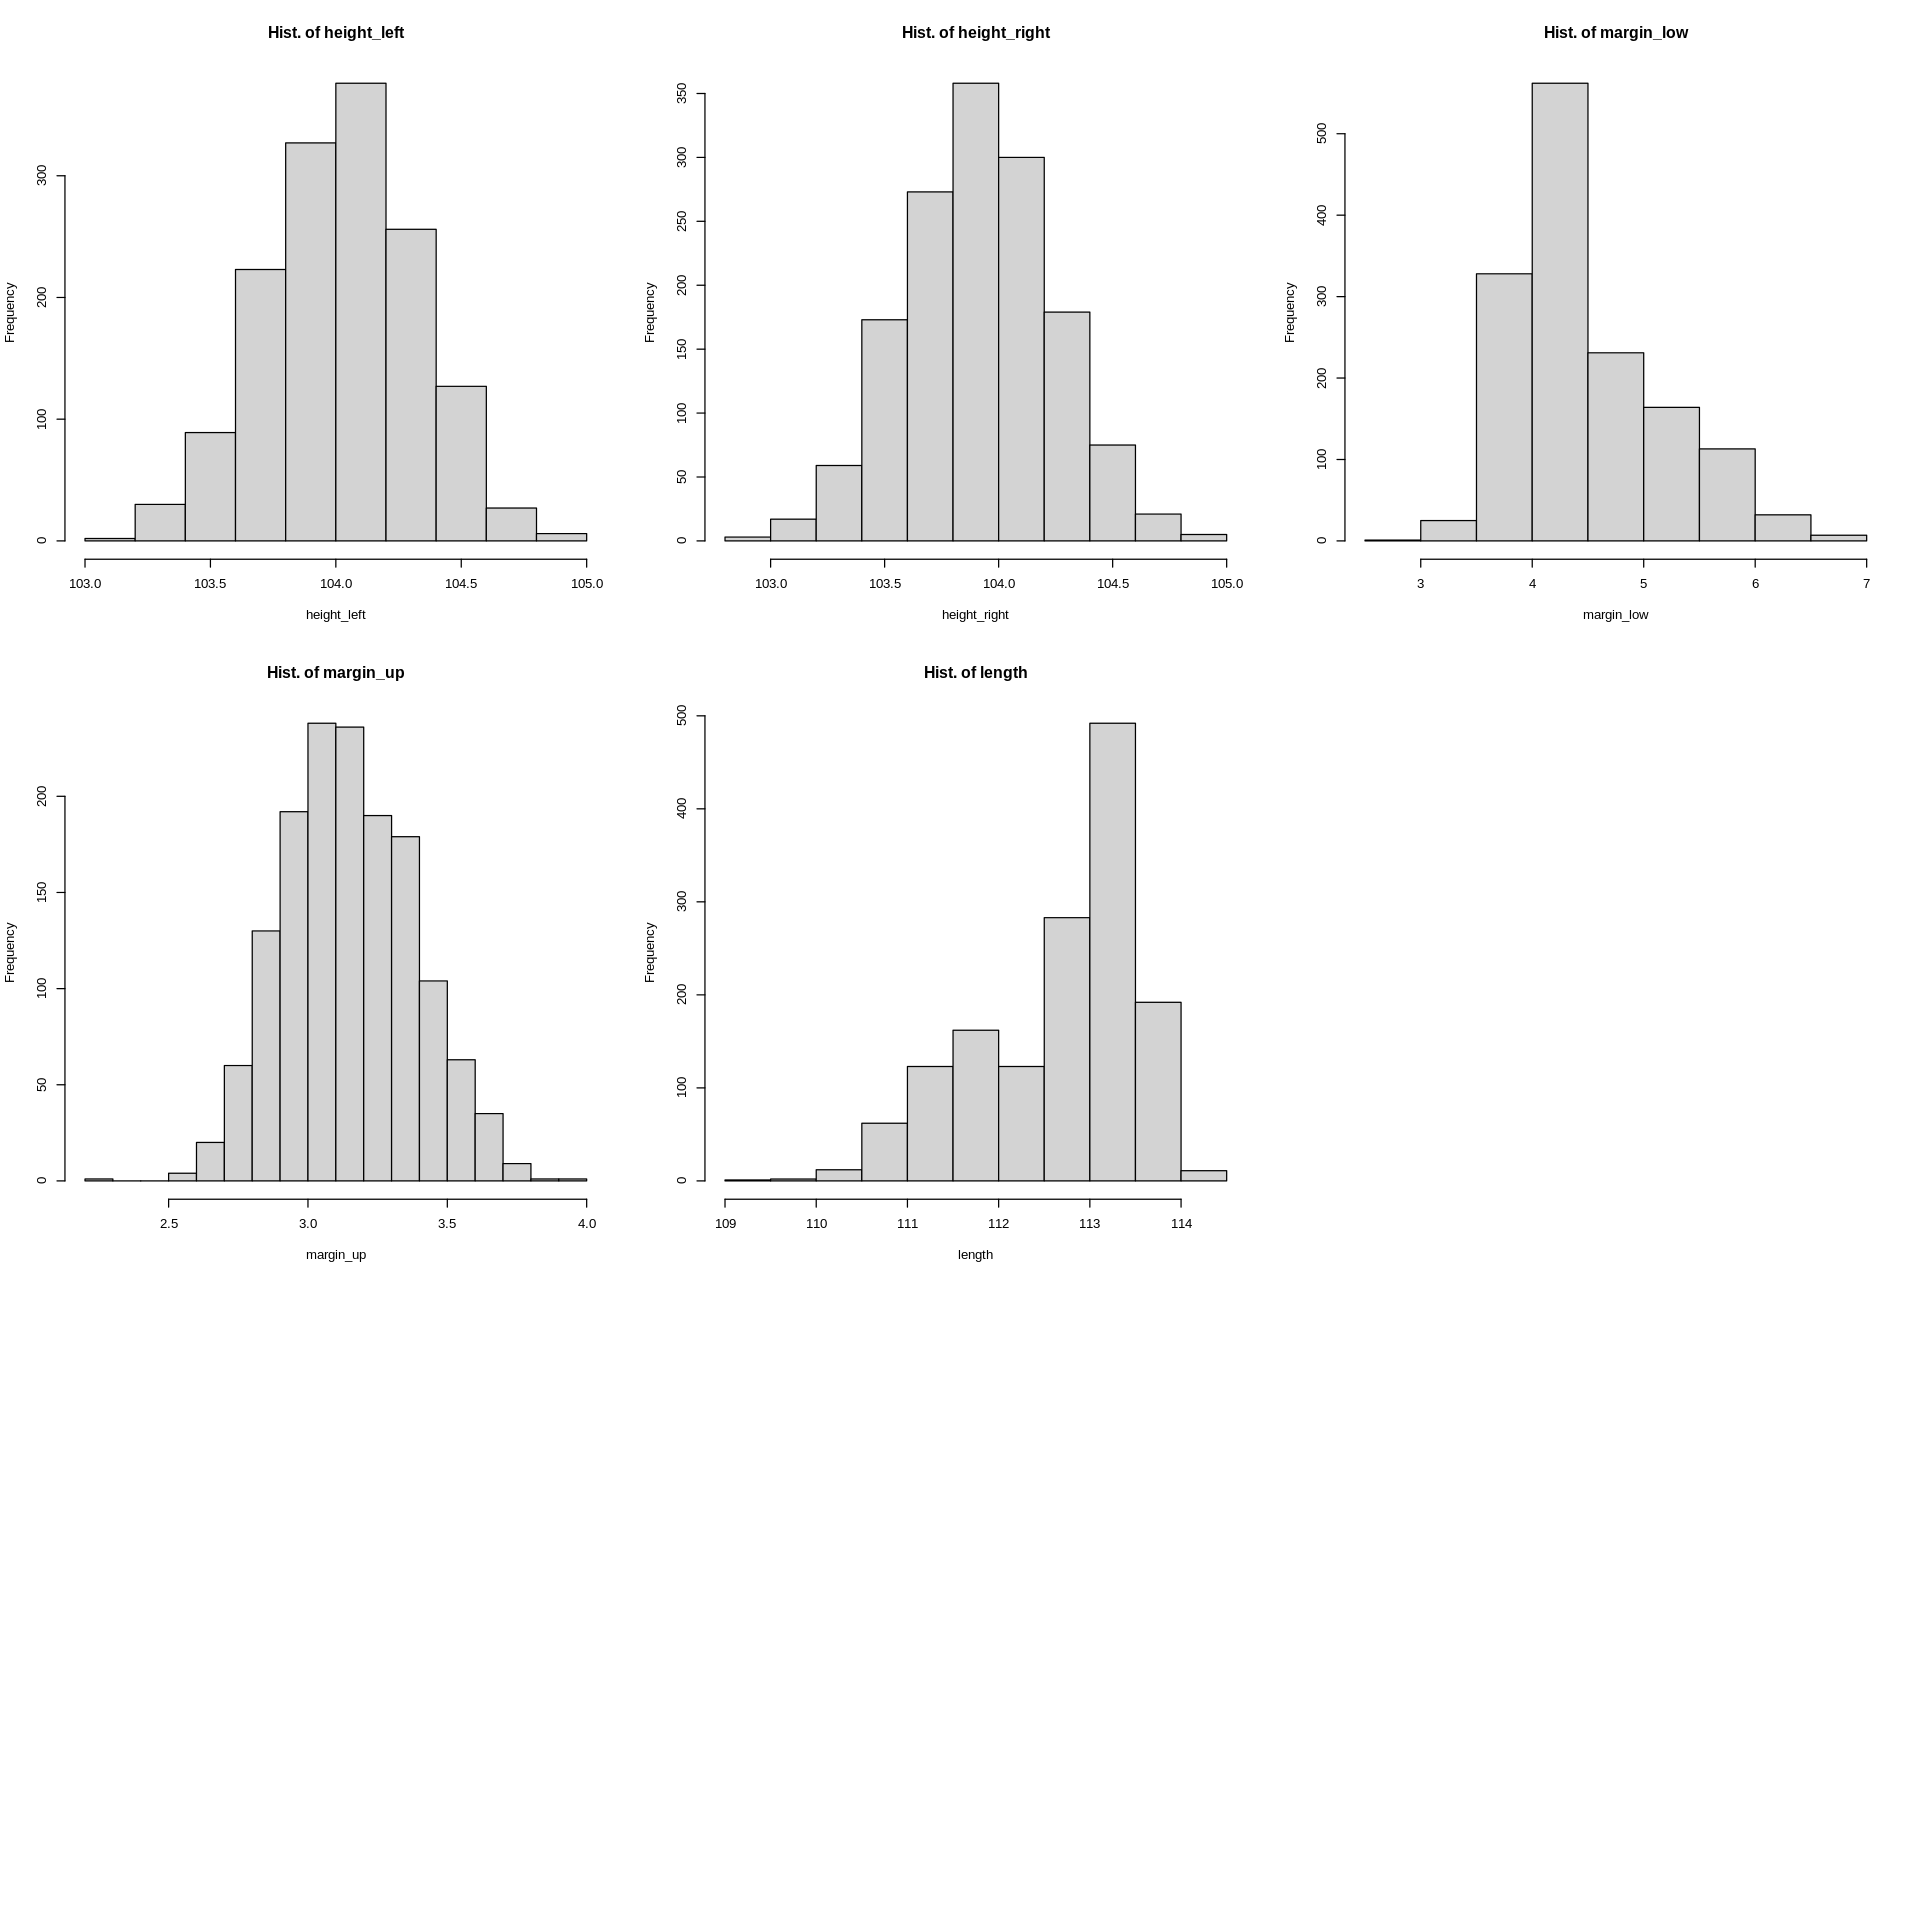

In [41]:
#this is the code for calculating histograms
#the library repr is resizing the graphs in the R kernel on the Jupyter notebooks on Google colab
# else they will be too small to be readable
#just using variables 2-6 because we know that is_geniune will be only 1's and 2's

library(repr)
options(repr.plot.width=16, repr.plot.height=16)
a <- colnames(df)[1:5] # Pick up all numeric columns/variables according to the names
par(mfrow = c(3, 3))    # Layout outputs in 4 rows and 4 columns
for (i in 1:length(a)){
  sub = df[a[i]][,1]   # Extract corresponding variable a[i] in sta

  hist(sub, main = paste("Hist. of", a[i], sep = " "), xlab = a[i])

}

In [42]:
##We are also going to look at the data type.  PCA only works with numerical data
#Because I already changed the True/False Response under "is_geniune" to 1/2 we are good!
str(df)

'data.frame':	1463 obs. of  5 variables:
 $ height_left : num  105 103 104 104 104 ...
 $ height_right: num  105 104 104 104 103 ...
 $ margin_low  : num  4.52 3.77 4.4 3.62 4.04 4.42 4.58 3.98 4 4.04 ...
 $ margin_up   : num  2.89 2.99 2.94 3.01 3.48 2.95 3.26 2.92 3.25 3.25 ...
 $ length      : num  113 113 113 114 113 ...


##Now let's talk about the five basic steps of Principal Component Analysis (PCA)##

##Remember that the ***goal of PCA is to measure the contribution of each variable - it is the measurement of highly dimensional data and capturing the most important information from it***

# **PCA Roadmap:**

##1) Data Normalization - because many variables within a dataset could be on different scales, to equally measure their contribution within a dataset, they must be normalized or put on the same scale.  For example if you are looking at salary and job satisfaction scores, those will be on different scales and must be normalized to measure their respective contributions within a dataset##

##2) Covariance Matrix - a covariance matrix between the normalized data is computed ##

##3) Eigenvectors and Eigenvalues - To have a basic understanding of PCA, it helps to understand that the data is in relationship to each other in 3-dimensional space.  The relationship between variables is not on a flat plane.  So an Eigenvector represents a direction, such as vertical or 90 degrees. And an eigenvalue represents the amount of variance for the given direction.  Each eigenvector has an eigenvalue. In Step 3 we compute the eigenvalues and eigenvectors to identify the principal components##

##4) Selecting principal components. We do this based upon the variation in the principal components and Scree Plots.##

##5) Data transformation according to the new principal components - so that the data is now along the lines of the new principal components axes.##



###We are going to check for missing because missing data when we normalize it will bias results. The colSums() function combined with is.na() retuns the number of missing values in each column##

In [43]:
colSums(is.na(df))
count(df)

height_left height_right   margin_low    margin_up       length 
           0            0            0            0            0

n
<int>
1463


In [44]:
#Because there are 37 observations that are missing in the "height_right" column, we are going to delete those rows.
#For PCA in this instance, imputation would not be appropriate
#running the count function from dplyr tells us that we still have 1463 observations
df <- na.omit(df)
count(df)

n
<int>
1463


In [45]:
#In our next step we are putting all variables on the same scale through normalization
data_normalized <- scale(df)
head(data_normalized)

,height_left,height_right,margin_low,margin_up,length
1,2.7658616,3.1726813,0.05126870,-1.1365937,0.1777815
2,-2.2407234,-0.8065749,-1.07856821,-0.7045647,0.4755295
3,1.4975267,-1.3001261,-0.12950521,-0.9205792,0.5556924
4,-0.4049756,0.0571396,-1.30453559,-0.6181589,0.9565070
5,0.8299821,-1.4235139,-0.67182692,1.4123777,-0.1543220
6,-0.9723885,0.4889969,-0.09937622,-0.8773763,0.1548778


In [46]:
#calculating a correlation matrix
corr_matrix <- cor(data_normalized)
corr_matrix

,height_left,height_right,margin_low,margin_up,length
height_left,1.0000000,0.2351316,0.3026430,0.2438122,-0.3143444
height_right,0.2351316,1.0000000,0.3910851,0.3068672,-0.4042722
margin_low,0.3026430,0.3910851,1.0000000,0.4316061,-0.6667528
margin_up,0.2438122,0.3068672,0.4316061,1.0000000,-0.5211389
length,-0.3143444,-0.4042722,-0.6667528,-0.5211389,1.0000000


###What we can see is that the most highly correlated variables include margin_low to length (negatively) and margin_up to length (also negatively), as well as height_left to length (mildly, negatively).###

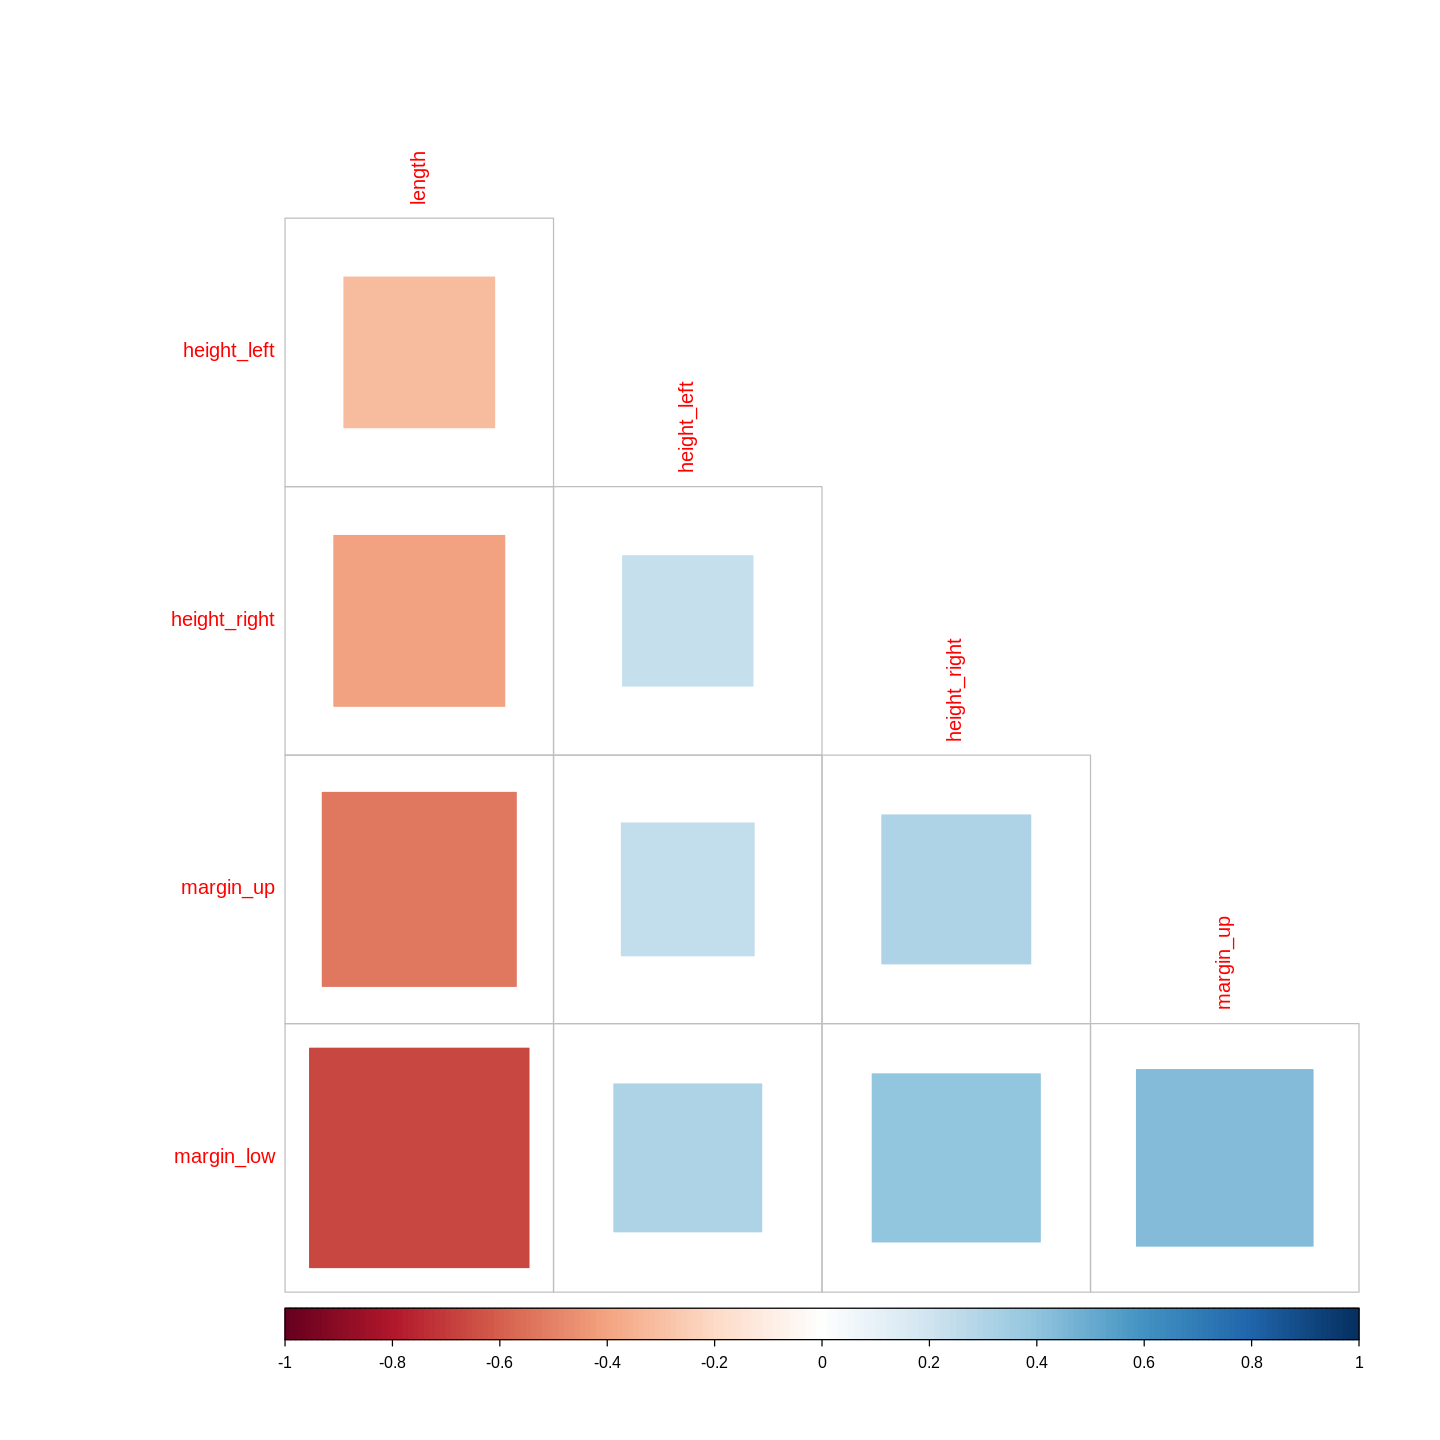

In [47]:
#visualiztion of the correlation matrix
library(repr)
options(repr.plot.width=12, repr.plot.height=12)
library(corrplot)
corrplot(corr_matrix, method = 'square', order = 'FPC', type = 'lower', diag = FALSE)

###Bartlett's Test for Sphericity###
##To test for the first assumption, we perform Bartlett’s Test for Sphericity.##

##The null hypothesis for Bartlett's is that there is no collinearity between the variables, which would render PCA impossible as it depends on correlation between the variables.##

##Our significance level will be p>.05##

In [48]:
#We can reject the null and proceed
cortest.bartlett(corr_matrix, n = nrow(data_normalized))

$chisq
[1] 1870.182

$p.value
[1] 0

$df
[1] 10

##Now we will check to see if we have an adequate sample to run PCA using the Kaiser-Meyer-Olkin (KMO)##

###We calculate this from a function called from the psych library##

In [49]:
#Generally KMO's above .80 and above are considered more than adequate sampling
#Another rule of thumb is 20 obs per every var, which we more than meet
library(psych)
KMO(data_normalized)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = data_normalized)
Overall MSA =  0.78
MSA for each item = 
 height_left height_right   margin_low    margin_up       length 
        0.89         0.88         0.74         0.83         0.71 

# Applying Our PCA

In [50]:
#Now we can proceed with our PCA
#princomp runs the PCA and summary shows the result
data.pca <- princomp(corr_matrix)
summary(data.pca)

Importance of components:
                          Comp.1     Comp.2     Comp.3     Comp.4       Comp.5
Standard deviation     0.9943453 0.34880498 0.31009686 0.24027008 6.411635e-09
Proportion of Variance 0.7820457 0.09623278 0.07605932 0.04566222 3.251587e-17
Cumulative Proportion  0.7820457 0.87827846 0.95433778 1.00000000 1.000000e+00

###We can see that effectively, 5 principal components have been generated. The first component, looking at the Cumulative Proportion row, explains 78% of the total variance.  Component 2, explains 9.67% more of the total variance and Component 3 explains almost an additional 7.58%. This means that the first component represents the majority of the data, then the second, and then the rest contribute less and less.

In [51]:
#loadings
data.pca$loadings[, 1:4]

,Comp.1,Comp.2,Comp.3,Comp.4
height_left,0.2641688,0.914308139,0.13426156,0.20712998
height_right,0.3501063,-0.335678945,0.77172730,0.36058843
margin_low,0.5118751,-0.069259517,-0.04179027,-0.72286178
margin_up,0.4232026,-0.215737893,-0.61912349,0.54735321
length,-0.6054121,-0.004533522,0.03674892,0.07034527


###The loading matrix shows that the first principal component has high negative value for length, but a high positive value for margin_low. This indicates that This suggests that bills with shorter length, overall will have a longer lower margin.##
##The second principal component has only one component which is very high and positive, indicating that solely those with a high left margin.##
##The third component shows a high, positive loading for height on the right side of the Bill related to negative length of the upper margin.##
##The last component,4, shows a high negative reading for length of the lower margin, inverse to length of the uppoer margin.##
##Remember that these readings/components are predictors of is_geniune for bills##


##Now we will conduct a couple of visualizations to help gain insight into the components##

##The first is a scree plot. This plot shows the eigenvalues in a downward curve, from highest to lowest. The first component can be considered to be the most significant since it contains 78% of the total information of the data. After that the increase in amount of information contributed by remaining components decreases steeply##

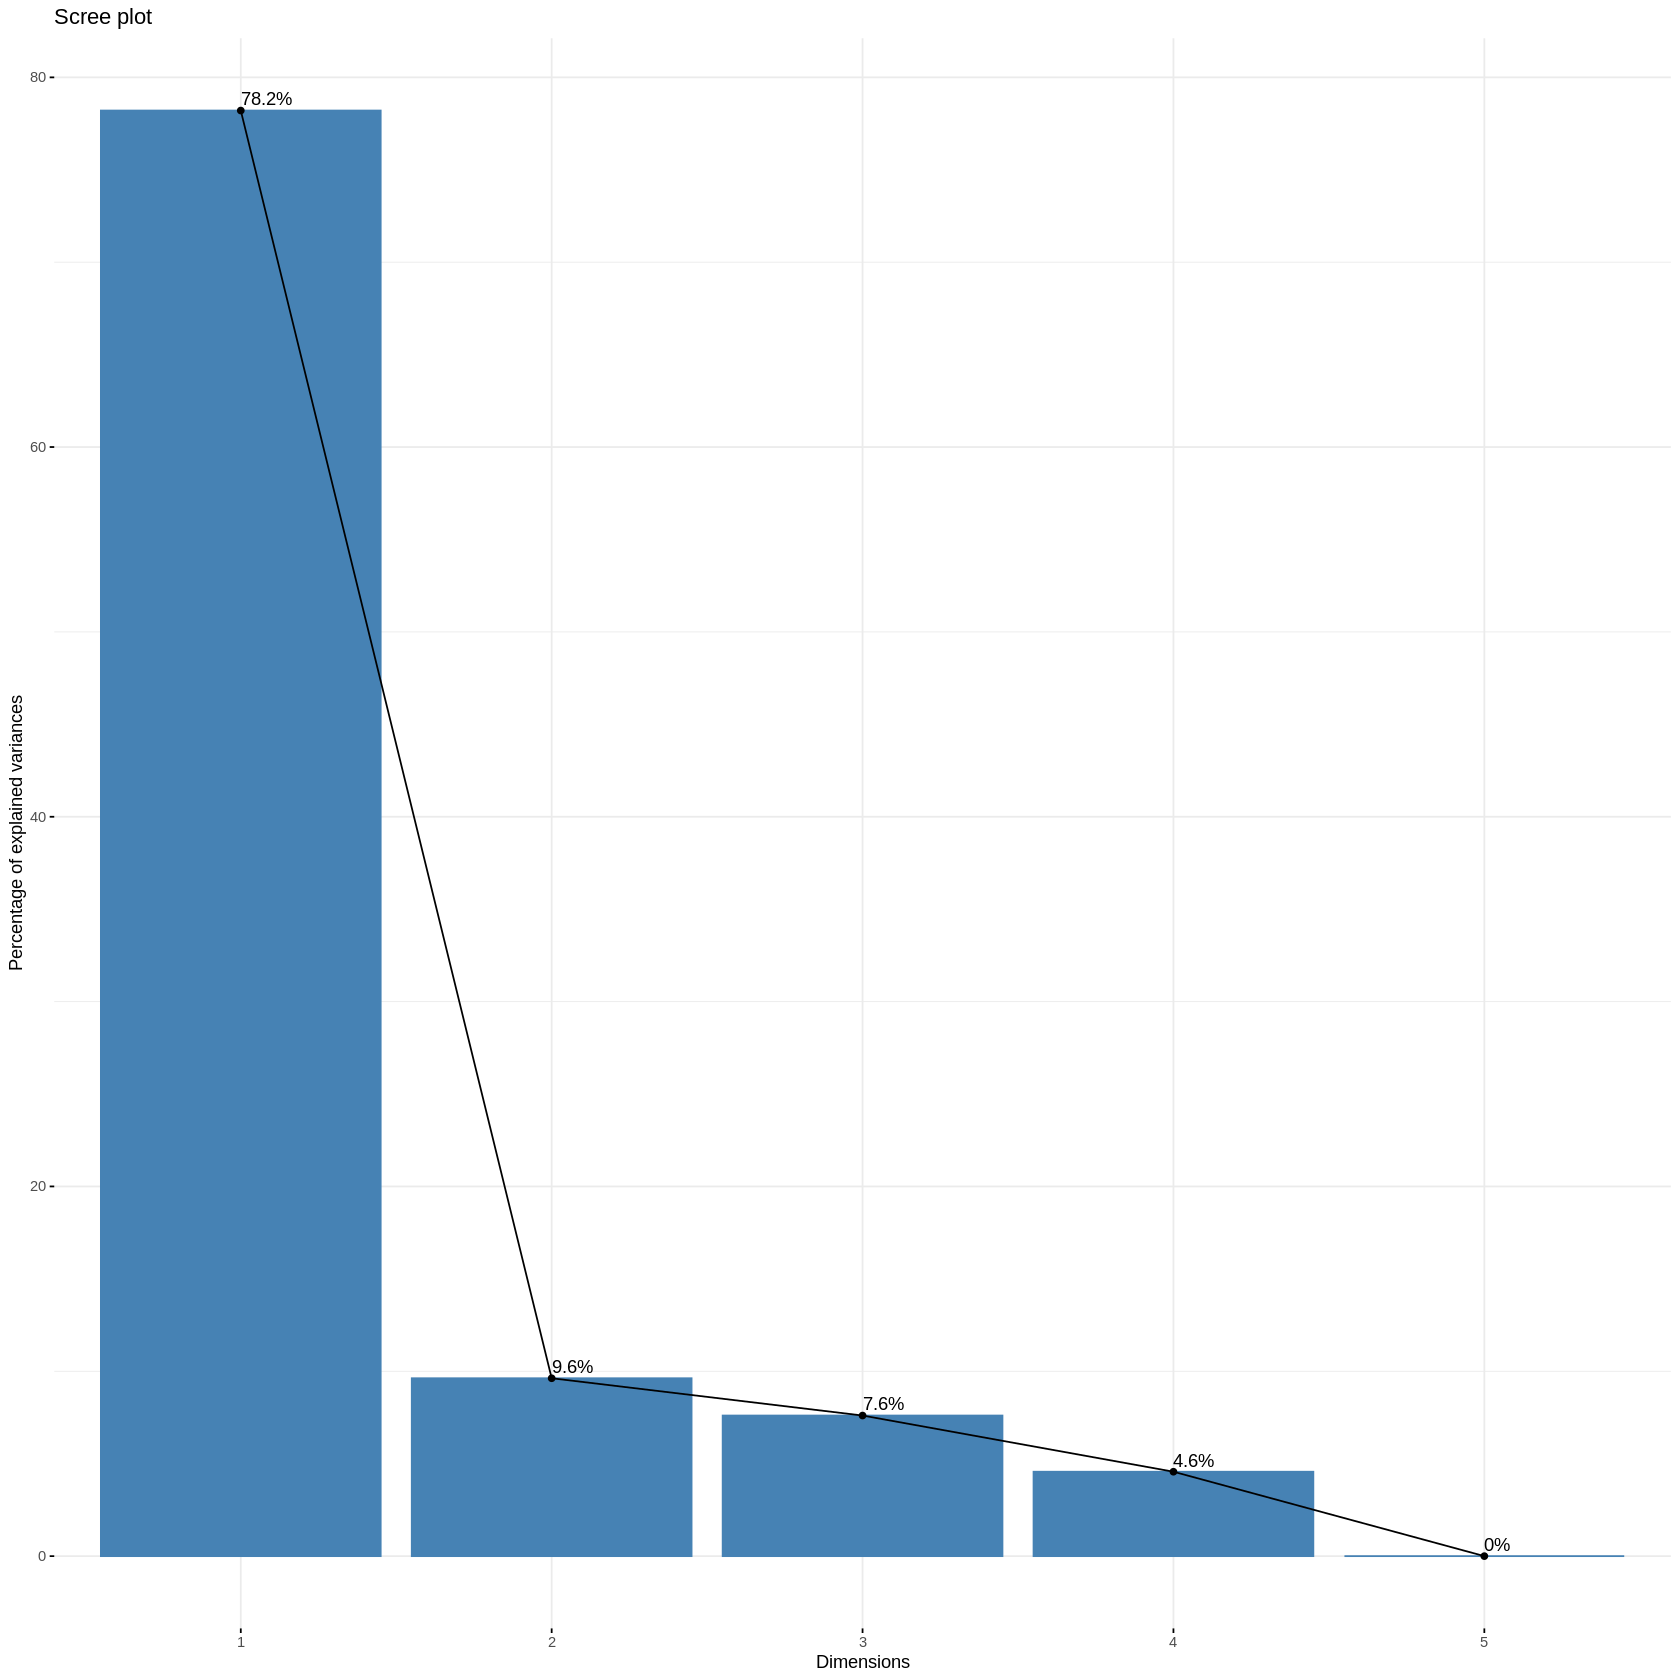

In [52]:
#scree plot
library(repr)
options(repr.plot.width=14, repr.plot.height=14)
fviz_eig(data.pca, addlabels = TRUE)

##Biplot of the attributes##
###With the biplot, we visualize the similarities and dissimilarities between the variables, and demonstrate the impact of each attribute on each of the principal components.###

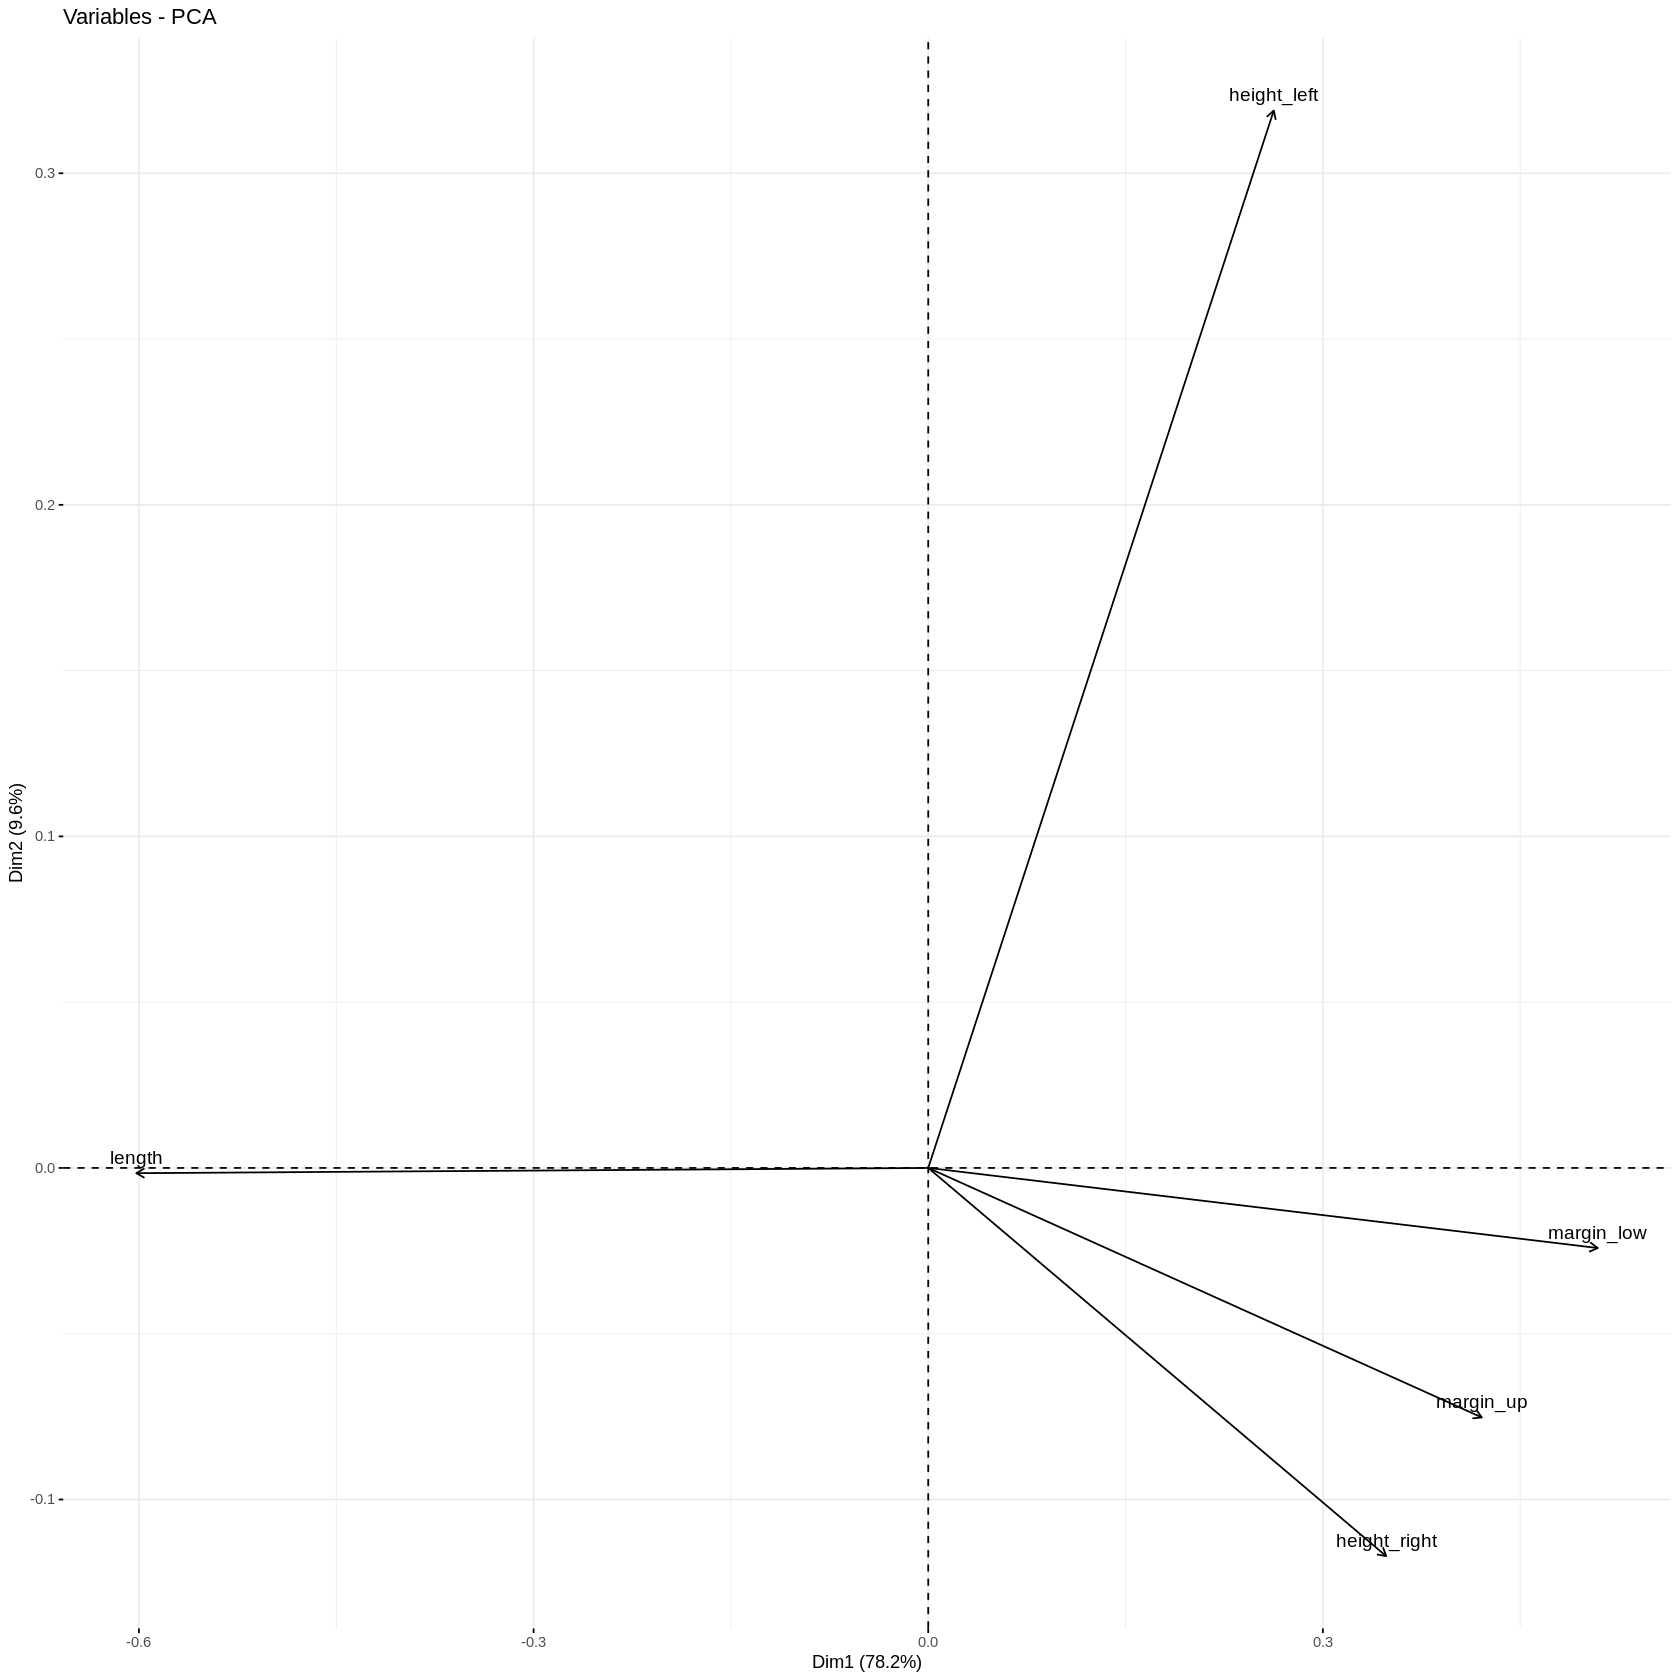

In [54]:

# Graph of the variables
library(repr)
options(repr.plot.width=14, repr.plot.height=14)
fviz_pca_var(data.pca, col.var = "black")


###First, all the variables that are grouped together are positively correlated to each other, such as margin_low, margin_up, and height_right.##
###Then, variables that are negatively correlated are displayed to the opposite sides of the biplot’s origin###


##Contribution of each variable##
###In this next visualization we are determining how much each variable is represented in a given component. Such a quality of representation is called the Cos2 and corresponds to the square cosine, and it is computed using the fviz_cos2 function.

###A low value means that the variable is not perfectly represented by that component. A high value, on the other hand, means a good representation of the variable on that component###



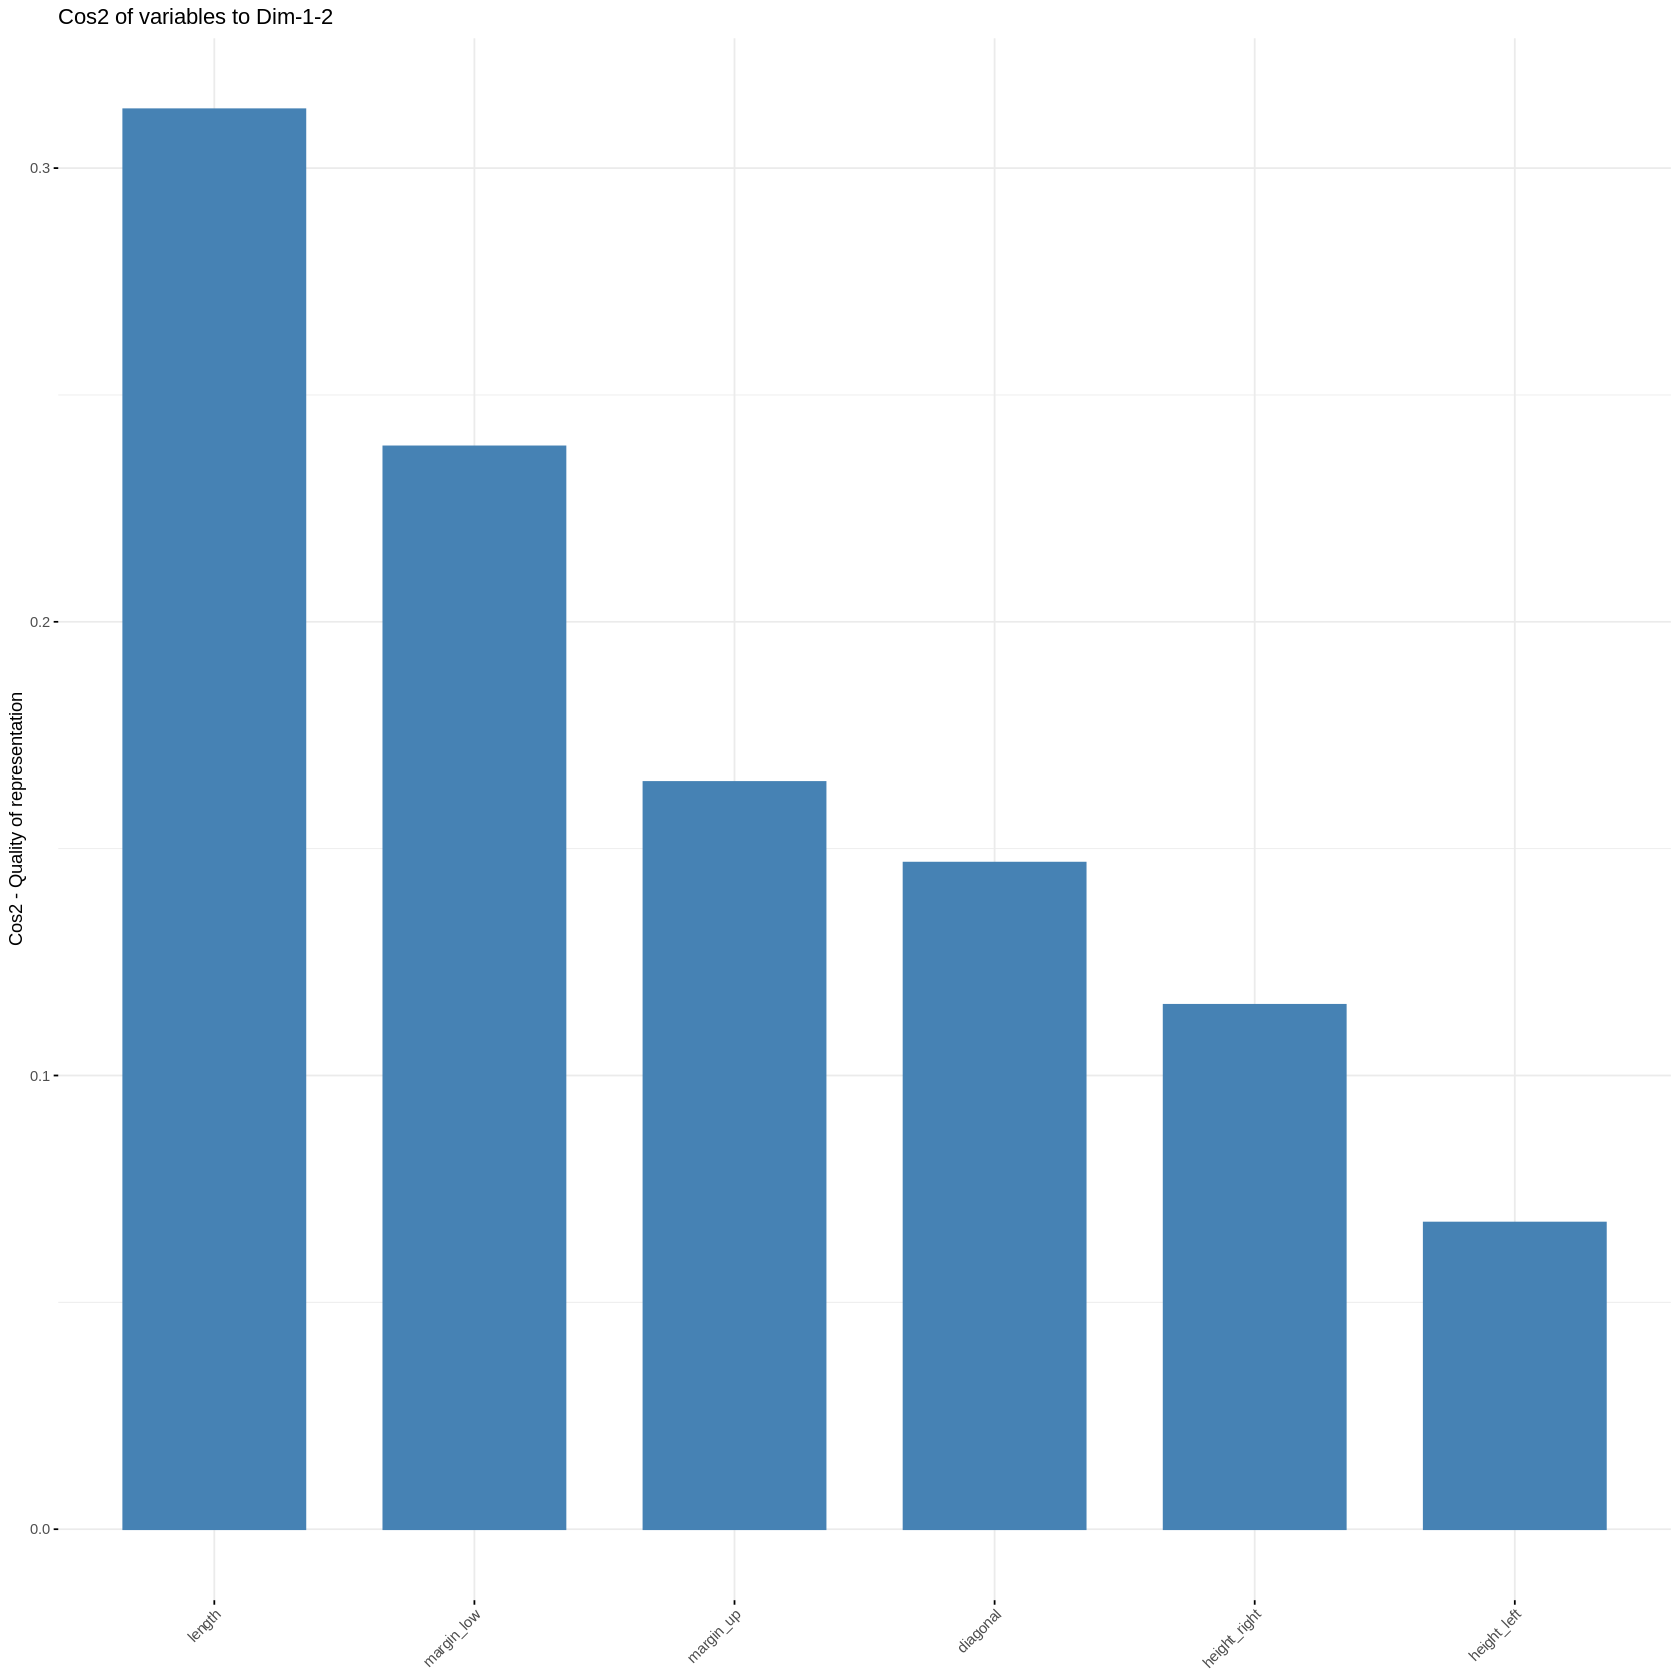

In [36]:
library(repr)
options(repr.plot.width=14, repr.plot.height=14)
fviz_cos2(data.pca, choice = "var", axes = 1:2)

###From the illustration above,length and margin_low are the variables with the highest cos2, hence contributing the most to PC1 and PC2.##